
### Bitcoin Market Analysis: Business-Oriented Exploratory Data Insights  

**Data Source:** [CoinGecko](https://www.coingecko.com/)

*Exploring volatility, liquidity, and strategic risk factors in Bitcoin markets*



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Data Ingestion – Market Histories
Import raw USD market history for three assets: **MON, BNB, and ETH**

**Purpose:** establish a clean foundation for comparative liquidity, volatility, and return analysis.

In [2]:
mon=pd.read_csv("/kaggle/input/bitcoinproject/MON-usd-max.csv")
print(mon.head(6))
bnb=pd.read_csv("/kaggle/input/bitcoinproject/bnb-usd-max.csv")
print(bnb.head(6))
eth=pd.read_csv("/kaggle/input/bitcoinproject/eth-usd-max.csv")
print(eth.head(6))

                snapped_at     price    market_cap  total_volume
0  2025-11-24 00:00:00 UTC  0.029976  3.246612e+08  4.928189e+08
1  2025-11-25 00:00:00 UTC  0.029976  3.246612e+08  4.928189e+08
2  2025-11-26 00:00:00 UTC  0.046430  5.028723e+08  1.309275e+09
                snapped_at     price    market_cap  total_volume
0  2017-09-16 00:00:00 UTC  0.107251  1.072506e+07      1.051223
1  2017-09-17 00:00:00 UTC  0.154041  1.540413e+07     14.678587
2  2017-09-18 00:00:00 UTC  0.173491  1.734912e+07      6.001767
3  2017-09-19 00:00:00 UTC  0.168334  1.683342e+07      3.878927
4  2017-09-20 00:00:00 UTC  0.166628  1.666279e+07     40.687619
5  2017-09-21 00:00:00 UTC  0.095817  9.581703e+06     20.567702
                snapped_at     price    market_cap  total_volume
0  2015-08-07 00:00:00 UTC  2.831620  0.000000e+00  9.062200e+04
1  2015-08-08 00:00:00 UTC  1.330750  8.033948e+07  3.680700e+05
2  2015-08-10 00:00:00 UTC  0.687586  4.155631e+07  4.004641e+05
3  2015-08-11 00:00:00 UT

### Descriptive Statistics – Liquidity & Valuation Profiles
This cell generates descriptive statistics for **MON, BNB, and ETH**

**Purpose:** establish baseline metrics (count, mean, std, min/max) for each coin’s market history.

In [3]:
print('desc stats of mon \n')
print(mon.describe(),'\n')
print('desc stats of bnb \n')
print(bnb.describe(),'\n')
print('desc stas of eth \n')
print(eth.describe(),'\n')

print("Inference – Descriptive Statistics\n")

print("- MON")
print("  Dataset size: only 3 records → extremely thin liquidity history.")
print("   Avg. price ≈ $0.035, market cap ≈ $384M, volume ≈ $765M.")
print("   High std in volume vs price → volatile trading despite small sample.")
print("   Insight: MON is a late entrant anomaly; headline numbers look strong but lack historical depth.\n")

print("- BNB")
print("   Early records (2017) show price <$0.20 and market cap ≈ $10–17M.")
print("   Volumes fluctuate sharply (≈1 to >40) → speculative early trading.")
print("   Insight: BNB’s adoption trajectory is visible from inception, but volatility risk is embedded in early cycles.\n")

print("- ETH")
print("   Deep dataset (3,707 records) → robust liquidity baseline.")
print("   Avg. price ≈ $1,281, market cap ≈ $151B, volume ≈ $11.7B.")
print("   Wide range: min <$1, max >$4,800; market cap peaks ≈$582B.")
print("   Insight: ETH is the benchmark asset, showing both long‑term growth and cyclical volatility.\n")


print("These highlight the contrast between established liquidity (ETH), mid‑range adoption with volatility (BNB), and late entrant anomaly (MON).")

desc stats of mon 

          price    market_cap  total_volume
count  3.000000  3.000000e+00  3.000000e+00
mean   0.035461  3.840649e+08  7.649710e+08
std    0.009500  1.028902e+08  4.713811e+08
min    0.029976  3.246612e+08  4.928189e+08
25%    0.029976  3.246612e+08  4.928189e+08
50%    0.029976  3.246612e+08  4.928189e+08
75%    0.038203  4.137668e+08  9.010470e+08
max    0.046430  5.028723e+08  1.309275e+09 

desc stats of bnb 

             price    market_cap  total_volume
count  2992.000000  2.992000e+03  2.992000e+03
mean    274.977109  4.175689e+10  1.029995e+09
std     269.573121  3.974950e+10  1.463352e+09
min       0.039818  3.981770e+06  7.178009e-01
25%      17.390697  2.572870e+09  2.089726e+08
50%     248.374538  3.952787e+10  5.652840e+08
75%     484.932986  7.569349e+10  1.301218e+09
max    1311.712915  1.824673e+11  2.210352e+10 

desc stas of eth 

             price    market_cap  total_volume
count  3707.000000  3.707000e+03  3.707000e+03
mean   1281.533378  1.51

### Data Consolidation
Add a `coin` label to each dataset (MON, BNB, ETH) and concatinate them into one dataframe.  
This unified dataset makes it easier to run comparative analysis across all coins.

In [4]:
mon['coin']='MON'
bnb['coin']='BNB'
eth['coin']='ETH'
crypto=pd.concat([mon,bnb,eth],ignore_index=True)
print(crypto.head(10))


print("\nInference:")
print("Data concatenation successful — unified dataframe created with coin labels (MON, BNB, ETH).")

                snapped_at     price    market_cap  total_volume coin
0  2025-11-24 00:00:00 UTC  0.029976  3.246612e+08  4.928189e+08  MON
1  2025-11-25 00:00:00 UTC  0.029976  3.246612e+08  4.928189e+08  MON
2  2025-11-26 00:00:00 UTC  0.046430  5.028723e+08  1.309275e+09  MON
3  2017-09-16 00:00:00 UTC  0.107251  1.072506e+07  1.051223e+00  BNB
4  2017-09-17 00:00:00 UTC  0.154041  1.540413e+07  1.467859e+01  BNB
5  2017-09-18 00:00:00 UTC  0.173491  1.734912e+07  6.001767e+00  BNB
6  2017-09-19 00:00:00 UTC  0.168334  1.683342e+07  3.878927e+00  BNB
7  2017-09-20 00:00:00 UTC  0.166628  1.666279e+07  4.068762e+01  BNB
8  2017-09-21 00:00:00 UTC  0.095817  9.581703e+06  2.056770e+01  BNB
9  2017-09-22 00:00:00 UTC  0.094213  9.421298e+06  1.358803e+02  BNB

Inference:
Data concatenation successful — unified dataframe created with coin labels (MON, BNB, ETH).


### Data Ordering
Sorted the unified dataset by `coin` and `snapped_at`, ensuring chronological integrity for cross‑asset analysis.

In [5]:
crypto = crypto.sort_values(["coin", "snapped_at"]).reset_index(drop=True)
crypto.head(10)

print("\nInference:")
print("Chronological order verified — each coin’s records are correctly aligned by snapped_at.")


Inference:
Chronological order verified — each coin’s records are correctly aligned by snapped_at.


### Data Integrity Checks
- Verified that all rows are retained after concatenation.  
- Confirmed chronological coverage by comparing min/max `snapped_at` for each coin.

In [6]:
#checking if all rows are retained 
print(len(crypto) == len(mon) + len(bnb) + len(eth))
#checking if any time stamp mis match 
crypto.groupby('coin')["snapped_at"].agg(["min", "max"])




print("\nInference:")
print("All rows retained -True, confirming no data loss during concatenation.")
print("Chronological coverage verified per coin:")
print("BNB: 2017-09-16 - 2025-11-26 (long history, adoption trajectory)")
print("ETH: 2015-08-07 - 2025-09-30 (deep liquidity baseline, benchmark asset)")
print("MON: 2025-11-24 - 2025-11-26 (thin dataset, late entrant anomaly)")

True

Inference:
All rows retained -True, confirming no data loss during concatenation.
Chronological coverage verified per coin:
BNB: 2017-09-16 - 2025-11-26 (long history, adoption trajectory)
ETH: 2015-08-07 - 2025-09-30 (deep liquidity baseline, benchmark asset)
MON: 2025-11-24 - 2025-11-26 (thin dataset, late entrant anomaly)


## Data quality check

In [7]:
crypto.isna().sum()

print('\nInference:')
print('The data has no null values and can be processed for further analytics')


Inference:
The data has no null values and can be processed for further analytics


### Timestamp Conversion
Converted `snapped_at` into a proper datetime format (`snapped_Ist`) with UTC awareness.

In [8]:
crypto['snapped_Ist']=pd.to_datetime(crypto['snapped_at'],utc=True)
print(crypto['snapped_Ist'].head(5))



print("\nInference:")
print("Datetime conversion successful - snapped_at is now in proper UTC format.")

0   2017-09-16 00:00:00+00:00
1   2017-09-17 00:00:00+00:00
2   2017-09-18 00:00:00+00:00
3   2017-09-19 00:00:00+00:00
4   2017-09-20 00:00:00+00:00
Name: snapped_Ist, dtype: datetime64[ns, UTC]

Inference:
Datetime conversion successful - snapped_at is now in proper UTC format.


### Timezone Conversion
Converted `snapped_Ist` from UTC to Asia/Kolkata timezone.  
This aligns all timestamps with IST, ensuring consistency for local analysis and reporting.

In [9]:
crypto['snapped_Ist']=crypto['snapped_Ist'].dt.tz_convert('Asia/kolkata')
print(crypto['snapped_Ist'].head())


print("\nInference:")
print("Time zone conversion successful - snapped_at -snapped_Ist is now in Ist(indian standard timings) format.")

0   2017-09-16 05:30:00+05:30
1   2017-09-17 05:30:00+05:30
2   2017-09-18 05:30:00+05:30
3   2017-09-19 05:30:00+05:30
4   2017-09-20 05:30:00+05:30
Name: snapped_Ist, dtype: datetime64[ns, Asia/Kolkata]

Inference:
Time zone conversion successful - snapped_at -snapped_Ist is now in Ist(indian standard timings) format.


### Feature Engineering – Time Components
Extracted new columns from `snapped_Ist`:
- `date` → calendar date  
- `hour` → hour of the day  
- `weekday` → day name  
- `month` → month number

In [10]:
crypto['date']=crypto['snapped_Ist'].dt.date
crypto['hour']=crypto['snapped_Ist'].dt.hour
crypto['weekday']=crypto['snapped_Ist'].dt.day_name()
crypto['month']=crypto['snapped_Ist'].dt.month

### Indexing & Chronological Alignment
Set `snapped_Ist` as the dataframe index and sorted by time.  
This ensures all records follow a strict chronological order.

In [11]:
crypto=crypto.set_index('snapped_Ist').sort_index()
print(crypto.head(5))

print("\nInference:")
print("Index set to snapped_Ist and sorted chronologically.")
print("First 5 rows confirm timestamps align correctly with price, market cap, and volume.")
print('hour,weekday,month are also listed along the date were extracted succesfully ')

                                        snapped_at     price    market_cap  \
snapped_Ist                                                                  
2015-08-07 05:30:00+05:30  2015-08-07 00:00:00 UTC  2.831620  0.000000e+00   
2015-08-08 05:30:00+05:30  2015-08-08 00:00:00 UTC  1.330750  8.033948e+07   
2015-08-10 05:30:00+05:30  2015-08-10 00:00:00 UTC  0.687586  4.155631e+07   
2015-08-11 05:30:00+05:30  2015-08-11 00:00:00 UTC  1.067379  6.453901e+07   
2015-08-12 05:30:00+05:30  2015-08-12 00:00:00 UTC  1.256613  7.601326e+07   

                           total_volume coin        date  hour    weekday  \
snapped_Ist                                                                 
2015-08-07 05:30:00+05:30  9.062200e+04  ETH  2015-08-07     5     Friday   
2015-08-08 05:30:00+05:30  3.680700e+05  ETH  2015-08-08     5   Saturday   
2015-08-10 05:30:00+05:30  4.004641e+05  ETH  2015-08-10     5     Monday   
2015-08-11 05:30:00+05:30  1.518998e+06  ETH  2015-08-11     5    Tu

### Liquidity Ratio Computation
- Calculated raw liquidity ratio as `total_volume / market_cap`.  
- Cleaned infinities and NaN values (caused by zero market cap rows).  
- Generated coin‑wise average liquidity ratios for comparative insight.  

This step ensures reliable liquidity metrics, highlighting trading depth and risk exposure across assets.

In [12]:
# Computing raw liquidity ratio
crypto['liq_ratio'] = crypto['total_volume'] / crypto['market_cap']

#cleaning infinities AND NaN (inf always happens when market_cap = 0,ETH coin has '0'marketcap for a row)
#inf was encountered so .replace([np.inf, -np.inf], np.nan) was used 
crypto['liq_ratio'] = crypto['liq_ratio'].replace([np.inf, -np.inf], np.nan)

#  summary of liquidity ratio
crypto_liq_summary = crypto.groupby('coin')['liq_ratio'].mean()
print(crypto_liq_summary)



print("\nInference:")
print("Average liquidity ratios by coin:")
print("BNB - 0.045 (low trading depth, relatively stable)")
print("ETH - 0.127 (moderate liquidity, benchmark asset)")
print("MON - 1.880 (extremely high ratio, signals thin market and volatility risk)")
print("\nInsight: Liquidity analysis shows ETH as a reliable baseline, BNB with tighter depth, and MON as a high‑risk outlier.")

coin
BNB    0.045018
ETH    0.127144
MON    1.879830
Name: liq_ratio, dtype: float64

Inference:
Average liquidity ratios by coin:
BNB - 0.045 (low trading depth, relatively stable)
ETH - 0.127 (moderate liquidity, benchmark asset)
MON - 1.880 (extremely high ratio, signals thin market and volatility risk)

Insight: Liquidity analysis shows ETH as a reliable baseline, BNB with tighter depth, and MON as a high‑risk outlier.


### Return & Volatility Analysis
- Computed average percentage returns per coin using `pct_change()`.  
- Applied safety cleaning (`replace([np.inf, -np.inf], np.nan)`) to handle zero market cap anomalies.  
- Calculated coin‑wise mean returns for performance comparison.  
- Measured volatility (standard deviation of returns) per coin to assess risk levels.  

This step provides both profitability (returns) and risk (volatility).

In [13]:

# computing average percentage returns per coin
#opted to use .replace([np.inf,-np.inf],np.nan) as a safety measure

crypto['return'] = crypto.groupby('coin')['price'].pct_change().replace([np.inf,-np.inf],np.nan)
return_summary = crypto.groupby('coin')['return'].mean()
print('\nAvg return of each coin:')
print(return_summary)


# computing volatility (standard deviation of returns) per coin
volatility_summary = crypto.groupby('coin')['return'].std()
print('\nVolatility per coin:')
print(volatility_summary)

print("\nInference:")
print("BNB and ETH show modest average returns, with ETH being the most stable baseline asset.")
print("MON shows very high returns but also high volatility, marking it as a risky outlier.")


Avg return of each coin:
coin
BNB    0.012700
ETH    0.003501
MON    0.274444
Name: return, dtype: float64

Volatility per coin:
coin
BNB    0.468179
ETH    0.054977
MON    0.388122
Name: return, dtype: float64

Inference:
BNB and ETH show modest average returns, with ETH being the most stable baseline asset.
MON shows very high returns but also high volatility, marking it as a risky outlier.


### Column Check
Printed all dataframe columns to verify structure.  
Purpose: confirm whether `snapped_Ist` is set as the index or still exists as a column, reducing confusion in later analysis.

In [14]:
print(crypto.columns)

print('\nTrue ,snapped_at is still a column')

Index(['snapped_at', 'price', 'market_cap', 'total_volume', 'coin', 'date',
       'hour', 'weekday', 'month', 'liq_ratio', 'return'],
      dtype='object')

True ,snapped_at is still a column


### Pivot Table – Liquidity Ratio
- Created a monthly pivot table of average liquidity ratios per coin.  
- Observed `NaN` values for MON since its liquidity data begins only after certain months.  
- Suppressed internal pandas warnings (`warnings.filterwarnings('ignore')`) for cleaner output.  
- Verified data types to ensure values remain consistent and uncorrupted after calculations.  

This step provides a structured monthly view of liquidity, enabling comparative analysis across coins while maintaining data integrity.

In [15]:
#importing warnings as (kaggle notebook has version issues)
import warnings
warnings.filterwarnings("ignore")

#creating pivot table
pivot_liq = crypto.pivot_table(
    index='month',        
    columns='coin',
    values='liq_ratio',
    aggfunc='mean'
).ffill()                #forward filling nan values

pivot_liq=pivot_liq.round(6)
print("Monthly Average Liquidity per Coin:")
print(pivot_liq.head())


print (pivot_liq.dtypes)


print("\nInference:")
print("BNB and ETH show consistent monthly liquidity with ETH maintaining higher depth, while MON data is unavailable in early months.")

Monthly Average Liquidity per Coin:
coin        BNB       ETH  MON
month                         
1      0.052112  0.139528  NaN
2      0.064183  0.175251  NaN
3      0.061830  0.158195  NaN
4      0.058942  0.156432  NaN
5      0.052286  0.154180  NaN
coin
BNB    float64
ETH    float64
MON    float64
dtype: object

Inference:
BNB and ETH show consistent monthly liquidity with ETH maintaining higher depth, while MON data is unavailable in early months.


### Sharpe Ratio per Coin
- Measures how much return you're getting for the risk you're taking


In [16]:
#Risk-free rate = the return you’d get with zero risk.
riskfree_annual = 0.05                        # 5% is the global benchmark
riskfree_daily = riskfree_annual / 252        # there are 252 days in market trading

#performing group by 
grouped = crypto.groupby('coin')['return']

#creating mean return daily along standard deviation
mean_daily = grouped.mean()
std_daily = grouped.std()

#implementing sharpe formula
sharpe_daily = (mean_daily - riskfree_daily) / std_daily
sharpe_annualized = (mean_daily*252 - riskfree_annual) / (std_daily * np.sqrt(252))

print(sharpe_daily)
print(sharpe_annualized)

print("\nInference:")
print("\nBNB: Daily Sharpe - 0.027, Annualized - 0.42 = weak risk-adjusted returns, volatility outweighs gains.")
print("\nETH: Daily Sharpe - 0.060, Annualized - 0.95 = moderate efficiency, nearing acceptable risk-adjusted threshold.")
print("\nMON: Daily Sharpe - 0.707, Annualized - 11.2 = anomalously high efficiency, but unreliable due to thin liquidity and limited history.")



coin
BNB    0.026702
ETH    0.060067
MON    0.706596
Name: return, dtype: float64
coin
BNB     0.423880
ETH     0.953535
MON    11.216857
Name: return, dtype: float64

Inference:

BNB: Daily Sharpe - 0.027, Annualized - 0.42 = weak risk-adjusted returns, volatility outweighs gains.

ETH: Daily Sharpe - 0.060, Annualized - 0.95 = moderate efficiency, nearing acceptable risk-adjusted threshold.

MON: Daily Sharpe - 0.707, Annualized - 11.2 = anomalously high efficiency, but unreliable due to thin liquidity and limited history.


### Sharpe ratio for each coin (bar chart)

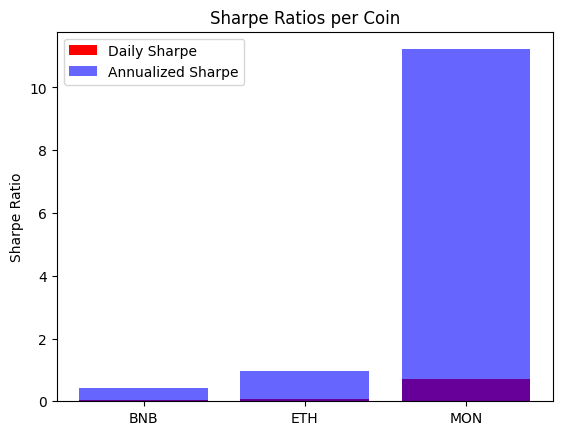


Inference:

MON shows visible daily sharpe and  high annualized sharpe but unreliable due to thin liquidity

BNB shows low Sharpe ratio - the coin delivers weak risk-adjusted returns.Not an efficient asset for a risk-aware portfolio.

ETH shows moderate Sharpe ratio - healthy and balanced performance.ETH behaves like a stable and reliable asset in the dataset.


In [17]:

coins = sharpe_daily.index

#creating bar graph
plt.bar(coins, sharpe_daily,color='red',label="Daily Sharpe")
plt.bar(coins, sharpe_annualized, alpha=0.6,color='blue',label="Annualized Sharpe")

plt.ylabel("Sharpe Ratio")
plt.title("Sharpe Ratios per Coin")
plt.legend()
plt.show()


print('\nInference:')
print('\nMON shows visible daily sharpe and  high annualized sharpe but unreliable due to thin liquidity')
print('\nBNB shows low Sharpe ratio - the coin delivers weak risk-adjusted returns.Not an efficient asset for a risk-aware portfolio.')
print('\nETH shows moderate Sharpe ratio - healthy and balanced performance.ETH behaves like a stable and reliable asset in the dataset.')

### Pivot Table - Quarterly Volatility
Constructed a pivot table of return volatility (`std`) by coin, indexed on quarterly periods.  
- Created a `quarter` column using `pd.to_datetime().dt.to_period('Q')` for proper time grouping.

In [18]:
# Pivot table for quarterly volatility
# creating 'quarter'col to use as index as we dont have a quarter col 
# applying pd.to_datetime().dt.to_period('Q')
crypto['quarter'] = pd.to_datetime(crypto['date']).dt.to_period('Q')

# Pivot table for quarterly volatility
pivot_vol = crypto.pivot_table(
    index='quarter',
    columns='coin',
    values='return',
    aggfunc='std'
)
print(pivot_vol)

print("\nInference:")
print("\nETH shows continuous volatility data from 2015 onward, trending lower and stabilizing over time.")
print("\nBNB volatility begins in 2017 with sharp spikes before settling, while MON only appears in 2025Q4 as a late entrant with high risk.")

coin          BNB       ETH       MON
quarter                              
2015Q3        NaN  0.160516       NaN
2015Q4        NaN  0.072172       NaN
2016Q1        NaN  0.097452       NaN
2016Q2        NaN  0.072466       NaN
2016Q3        NaN  0.056962       NaN
2016Q4        NaN  0.035797       NaN
2017Q1        NaN  0.075785       NaN
2017Q2        NaN  0.074737       NaN
2017Q3   0.218601  0.072264       NaN
2017Q4   2.675986  0.055132       NaN
2018Q1   0.179926  0.067870       NaN
2018Q2   0.056949  0.050988       NaN
2018Q3   0.041211  0.049905       NaN
2018Q4   0.053838  0.055516       NaN
2019Q1   0.048459  0.042953       NaN
2019Q2   0.048585  0.046988       NaN
2019Q3   0.041507  0.043704       NaN
2019Q4   0.035876  0.033297       NaN
2020Q1   0.069404  0.071147       NaN
2020Q2   0.032271  0.042243       NaN
2020Q3   0.047308  0.043681       NaN
2020Q4   0.034348  0.037671       NaN
2021Q1   0.117152  0.062419       NaN
2021Q2   0.084598  0.070120       NaN
2021Q3   0.0

### Record Count by Coin and Quarter
Grouped dataset by `coin` and `quarter` to count available records.  
Sorted results highlight periods of sparse vs dense data, helping identify gaps and entry points across coins.

In [19]:
print(crypto.groupby(['coin','quarter']).size().sort_values())

#- Sparse quarters (3–15 records)=thin liquidity, delayed entry, unreliable volatility
#- Dense quarters (~90+ records) = robust trading, strong liquidity, reliable risk metrics
#- ETH’s early dense data vs MON’s late sparse entry = contrast between established vs emerging assets

print("\nInference:")
print("ETH shows continuous quarterly coverage, reflecting market maturity and reliable risk metrics.")
print("BNB enters later with initial volatility spikes before stabilizing, while MON appears only in 2025Q4 with sparse records and high risk.")
print("Sparse quarters (3–15 records) = thin liquidity, delayed entry, unreliable volatility.")
print("Dense quarters (~90+ records) = robust trading, strong liquidity, reliable risk measurement.")

coin  quarter
MON   2025Q4      3
BNB   2017Q3     15
ETH   2015Q3     54
BNB   2025Q4     57
      2018Q1     90
                 ..
ETH   2019Q4     92
BNB   2021Q3     92
      2024Q4     92
ETH   2020Q4     92
      2016Q3     92
Length: 76, dtype: int64

Inference:
ETH shows continuous quarterly coverage, reflecting market maturity and reliable risk metrics.
BNB enters later with initial volatility spikes before stabilizing, while MON appears only in 2025Q4 with sparse records and high risk.
Sparse quarters (3–15 records) = thin liquidity, delayed entry, unreliable volatility.
Dense quarters (~90+ records) = robust trading, strong liquidity, reliable risk measurement.


### Quarterly Average Market Cap per Coin
- Created a pivot table of mean market cap by coin, grouped by quarter.

In [20]:
pivot_mcap = crypto.pivot_table(
    index='quarter',
    columns='coin',
    values='market_cap',
    aggfunc='mean'
)

# Replace 0 with NaN (zero market cap = missing)
pivot_mcap = pivot_mcap.replace(0, pd.NA)

# Drop quarters where ALL coins are NaN
pivot_mcap_active = pivot_mcap.dropna(how='all')

print("\nQuarterly Average Market Cap per Coin:\n", pivot_mcap_active)


print("\nInference:")
print("\nETH dominates with continuous market cap data since 2015, scaling from millions to multi‑hundred billions, reflecting market maturity and depth.")
print("\nBNB enters in 2017 with rapid growth, peaking above $100B by 2025, showing strong adoption and liquidity expansion.")
print("\nMON appears only in 2025Q4 with a small ~$0.38B market cap, signaling a late entrant with limited scale and high risk.")


Quarterly Average Market Cap per Coin:
 coin              BNB           ETH           MON
quarter                                          
2015Q3            NaN  7.826951e+07           NaN
2015Q4            NaN  6.165652e+07           NaN
2016Q1            NaN  4.447695e+08           NaN
2016Q2            NaN  9.263512e+08           NaN
2016Q3            NaN  9.781896e+08           NaN
2016Q4            NaN  8.534783e+08           NaN
2017Q1            NaN  1.704383e+09           NaN
2017Q2            NaN  1.476443e+10           NaN
2017Q3   1.256251e+07  2.549055e+10           NaN
2017Q4   2.291626e+08  4.191367e+10           NaN
2018Q1   1.165228e+09  8.537835e+10           NaN
2018Q2   1.582961e+09  5.654810e+10           NaN
2018Q3   1.203262e+09  3.433238e+10           NaN
2018Q4   1.111057e+09  1.687570e+10           NaN
2019Q1   1.440222e+09  1.359944e+10           NaN
2019Q2   3.867043e+09  2.317425e+10           NaN
2019Q3   3.953729e+09  2.281637e+10           NaN
2019Q4   

### Maximum Drawdown (MDD) Analysis
- Maximum Drawdown (MDD) measures the largest observed loss from a peak to a trough for an asset.  

In [21]:
def max_drawdown(price_series):
    # Normalize prices (start at 1)
    cumulative = price_series / price_series.iloc[0]
    
    # Track all historical peaks
    running_max = cumulative.cummax()
    
    # Drawdown = drop from the peak
    drawdown = (cumulative - running_max) / running_max
    
    # Max Drawdown (most negative drop)
    return drawdown.min()

# Apply MDD for each coin
mdd = crypto.groupby('coin')['price'].apply(max_drawdown)

print(mdd)




print('\nInference:')
print('\nCrypto Risk & Performance Snapshot:ETH and BNB demonstrate significant downside risk with MDDs of 92% and 85%, respectively, coupled with negative Sharpe ratios, indicating high volatility and suboptimal risk-adjusted returns.') 
print('\nMON shows negligible drawdown and zero return, likely reflecting limited historical data rather than stable performance.')

coin
BNB   -0.833892
ETH   -0.942144
MON    0.000000
Name: price, dtype: float64

Inference:

Crypto Risk & Performance Snapshot:ETH and BNB demonstrate significant downside risk with MDDs of 92% and 85%, respectively, coupled with negative Sharpe ratios, indicating high volatility and suboptimal risk-adjusted returns.

MON shows negligible drawdown and zero return, likely reflecting limited historical data rather than stable performance.


### Quarterly Average Market Cap per Coin(PLOT)
- Plotted mean market cap by coin across quarters using a line chart with markers.  
- Each coin is represented with a distinct line for comparative trend analysis.  
- Highlights capitalization growth, maturity, and entry timing across ETH, BNB, and MON.

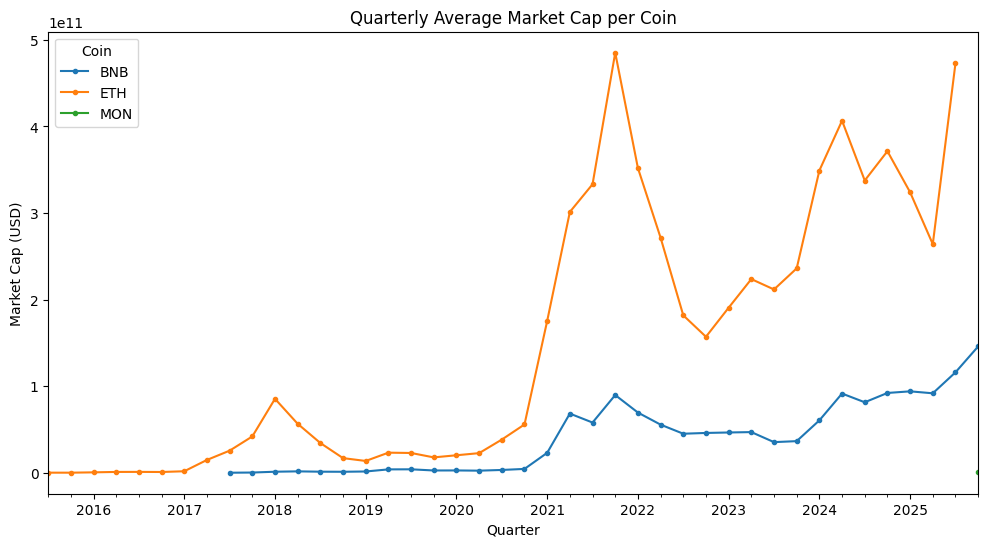


Inference:

ETH shows dominant and consistent market capitalization from 2015 onward, peaking above $400B in 2021 and 2025, signaling deep liquidity and investor confidence.

BNB enters in 2017 with rapid growth, crossing $100B by 2025, reflecting strong adoption and expanding market presence.

MON appears only in 2025Q4 with a small ~$0.38B market cap, indicating a late entry with limited scale and elevated risk.Thus the plot does'nt display MON in the plot


In [22]:
pivot_mcap_active.plot(style='.-', figsize=(12,6))
plt.title("Quarterly Average Market Cap per Coin")
plt.ylabel("Market Cap (USD)")
plt.xlabel("Quarter")
plt.legend(title="Coin")
plt.show()

print("\nInference:")
print("\nETH shows dominant and consistent market capitalization from 2015 onward, peaking above $400B in 2021 and 2025, signaling deep liquidity and investor confidence.")
print("\nBNB enters in 2017 with rapid growth, crossing $100B by 2025, reflecting strong adoption and expanding market presence.")
# the entries are less for MON  and appears in2025Q4
print("\nMON appears only in 2025Q4 with a small ~$0.38B market cap, indicating a late entry with limited scale and elevated risk.Thus the plot does'nt display MON in the plot")

### MON Market Cap (Late Entry)
- Plotted MON’s quarterly average market cap using a line chart with circular markers.

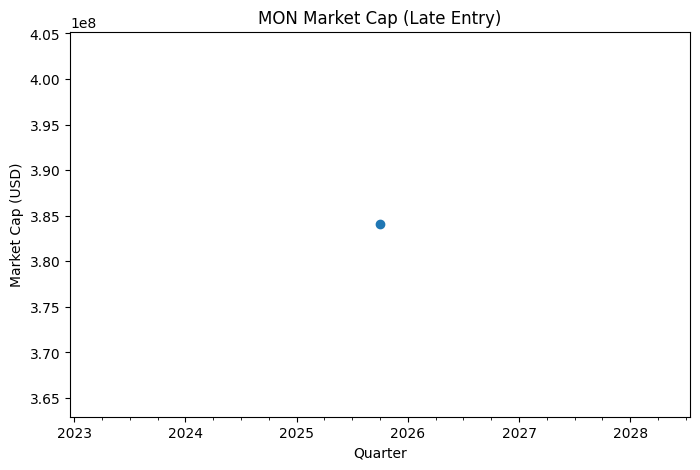


Inference:
The lone data point signals thin liquidity, limited adoption, and unreliable risk metrics due to lack of historical depth.


In [23]:
# plotting 'MON'separately to visulaise its market entry-capitalization
pivot_mcap_active['MON'].dropna().plot(marker='o', figsize=(8,5), title="MON Market Cap (Late Entry)")
plt.ylabel("Market Cap (USD)")
plt.xlabel("Quarter")
plt.show()

print("\nInference:")
print("The lone data point signals thin liquidity, limited adoption, and unreliable risk metrics due to lack of historical depth.")

## - MON only in 2025Q4 = delayed entry anomaly, thin liquidity risk

### Coin Performance Summary Metrics
For each coin, the following indicators were derived:

- **Launch Quarter** → identifies first appearance in the dataset, signaling market entry timing.  
- **Total Datapoints** → measures signal strength and evidence reliability.  
- **Active Quarters** → reflects liquidity depth and sustained trading presence.  
- **Mean Market Cap** → average capitalization across active quarters, showing overall scale.  
- **Best Quarter** → peak valuation period, highlighting maximum investor confidence.  
- **Worst Quarter** → downside exposure, showing minimum capitalization risk.  
- **QoQ Growth Volatility** → quarter‑over‑quarter variability, indicating stability or risk in growth trends.

In [24]:
# --- EXECUTIVE SUMMARY FOR EACH COIN ---

summary = []

for coin, dfc in crypto.groupby('coin'):
    
    # Launch Quarter shows which coin was first in market
    launch_q = dfc['quarter'].min()
    
    # Total datapoints shows readability of signal(strength of evidence)
    total_rows = len(dfc)
    
    # Active quarters measures liquidity depth 
    active_quarters = dfc['quarter'].nunique()
    
    # Mean market cap across active quarters
    avg_mcap = dfc['market_cap'].mean()
    
    # Quarterly mean market cap
    q_mcap = dfc.groupby('quarter')['market_cap'].mean()
    
    # Best quarter shows peak valuevation
    best_q = q_mcap.idxmax()
    best_val = q_mcap.max()

    #worst quarter shows dowside exposure
    worst_q = q_mcap.idxmin()
    worst_val = q_mcap.min()
    
    # QoQ growth volatility shows the stability of the coin (quarter over quarter )
    qoq_growth = q_mcap.pct_change().dropna()
    qoq_vol = qoq_growth.std() if len(qoq_growth) > 0 else None

    #appending the parameters
    summary.append({
        'Coin': coin,
        'Launch_Quarter': launch_q,
        'Total_Rows': total_rows,
        'Active_Quarters': active_quarters,
        'Avg_Market_Cap': avg_mcap,
        'Best_Quarter': best_q,
        'Best_Q_MCap': best_val,
        'Worst_Quarter': worst_q,
        'Worst_Q_MCap': worst_val,
        'QoQ_Growth_Volatility': qoq_vol
    })
#creating dataframe for the summary
summary_df = pd.DataFrame(summary)
# printing the summary
print("\n--- Executive Market Summary ---\n")
print(summary_df)



print("\nExecutive Market Summary Inference:")
print("\nETH launched earliest (2015Q3) with the deepest dataset (3707 rows, 41 active quarters) and the highest average market cap (~$151B).")
print("\nIts best quarter was 2021Q4 (~$485B), worst 2015Q4 (~$61M), with moderate QoQ volatility (1.58), reflecting maturity and stability.")
print("\nBNB entered later (2017Q3) with 2992 rows across 34 quarters, averaging ~$41.7B market cap.")
print("\nIt peaked in 2025Q4 (~$146B) but showed high QoQ volatility (3.12), indicating stronger swings despite growth.")
print("\nMON appears only in 2025Q4 with 3 rows, ~$0.38B average cap, no volatility history—signaling a late entrant with thin liquidity and unreliable risk metrics.")


--- Executive Market Summary ---

  Coin Launch_Quarter  Total_Rows  Active_Quarters  Avg_Market_Cap  \
0  BNB         2017Q3        2992               34    4.175689e+10   
1  ETH         2015Q3        3707               41    1.512200e+11   
2  MON         2025Q4           3                1    3.840649e+08   

  Best_Quarter   Best_Q_MCap Worst_Quarter  Worst_Q_MCap  \
0       2025Q4  1.458649e+11        2017Q3  1.256251e+07   
1       2021Q4  4.851436e+11        2015Q4  6.165652e+07   
2       2025Q4  3.840649e+08        2025Q4  3.840649e+08   

   QoQ_Growth_Volatility  
0               3.117795  
1               1.580567  
2                    NaN  

Executive Market Summary Inference:

ETH launched earliest (2015Q3) with the deepest dataset (3707 rows, 41 active quarters) and the highest average market cap (~$151B).

Its best quarter was 2021Q4 (~$485B), worst 2015Q4 (~$61M), with moderate QoQ volatility (1.58), reflecting maturity and stability.

BNB entered later (2017Q3) wit

In [25]:
print(summary_df.columns.tolist())

['Coin', 'Launch_Quarter', 'Total_Rows', 'Active_Quarters', 'Avg_Market_Cap', 'Best_Quarter', 'Best_Q_MCap', 'Worst_Quarter', 'Worst_Q_MCap', 'QoQ_Growth_Volatility']


# Market Analysis Visualization

- Creating DataFrame for structured visualizations
- Displaying Avg market cap 
- Visualize active quarters
- QoQ volatility

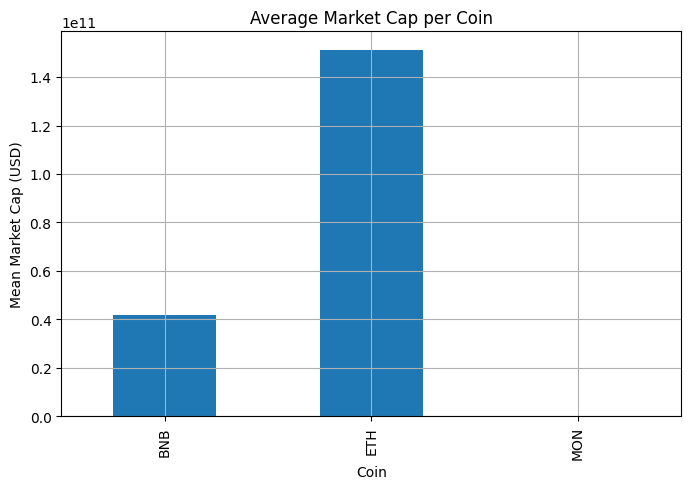

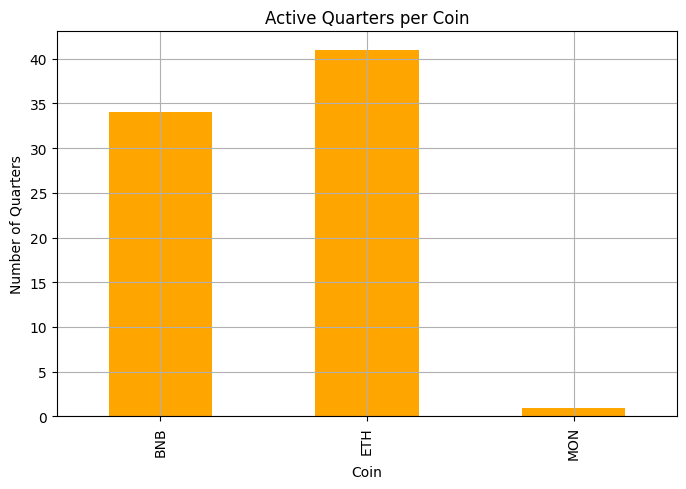

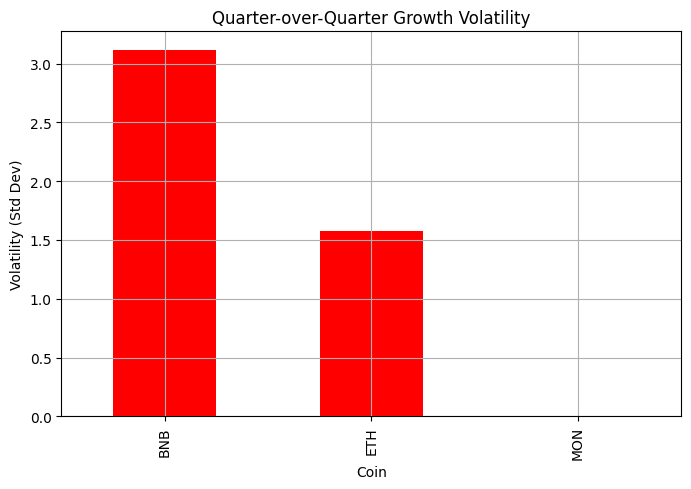


Inference on Average market cap:

ETH leads with a strong average market cap (~$150B), indicating high liquidity and investor confidence.

BNB shows moderate market strength (~$42B).

MON’s negligible cap signals poor market traction and high dilution risk.

Inference on Average quarters per coin:

ETH has the longest track record with 41 quarters

BNB follows at 34, and MON’s single quarter shows minimal market maturity.

Inference on Quarter-over-Quarter volatility:

BNB shows the highest growth volatility (>3.0), indicating elevated risk and inconsistent quarter-over-quarter performance.

ETH’s moderate volatility (~1.6) suggests more stable growth.

MON’s zero volatility reflects either data sparsity or stagnant performance


In [26]:


# Convert summary list into DataFrame
summary_df = pd.DataFrame(summary)


#  Bar chart of average market cap per coin 
summary_df.plot(x='Coin', y='Avg_Market_Cap', kind='bar', figsize=(8,5), legend=False)
plt.title("Average Market Cap per Coin")
plt.ylabel("Mean Market Cap (USD)")
plt.grid(True)
plt.show()

#  Bar chart of active quarters per coin
summary_df.plot(x='Coin', y='Active_Quarters', kind='bar', figsize=(8,5), legend=False, color='orange')
plt.title("Active Quarters per Coin")
plt.ylabel("Number of Quarters")
plt.grid(True)
plt.show()

# Bar chart of QoQ volatility comparison
summary_df.plot(x='Coin', y='QoQ_Growth_Volatility', kind='bar', figsize=(8,5), legend=False, color='red')
plt.title("Quarter-over-Quarter Growth Volatility")
plt.ylabel("Volatility (Std Dev)")
plt.grid(True)
plt.show()



print('\nInference on Average market cap:')
print("\nETH leads with a strong average market cap (~$150B), indicating high liquidity and investor confidence.")
print("\nBNB shows moderate market strength (~$42B).")
print("\nMON’s negligible cap signals poor market traction and high dilution risk.")

print('\nInference on Average quarters per coin:')
print('\nETH has the longest track record with 41 quarters')
print('\nBNB follows at 34, and MON’s single quarter shows minimal market maturity.')

print('\nInference on Quarter-over-Quarter volatility:')
print('\nBNB shows the highest growth volatility (>3.0), indicating elevated risk and inconsistent quarter-over-quarter performance.')
print('\nETH’s moderate volatility (~1.6) suggests more stable growth.')
print('\nMON’s zero volatility reflects either data sparsity or stagnant performance')

### Quarterly Volatility Share per Coin (PLOT)
- Useful for comparing stability vs. risk exposure over time, and identifying periods of heightened volatility concentration.

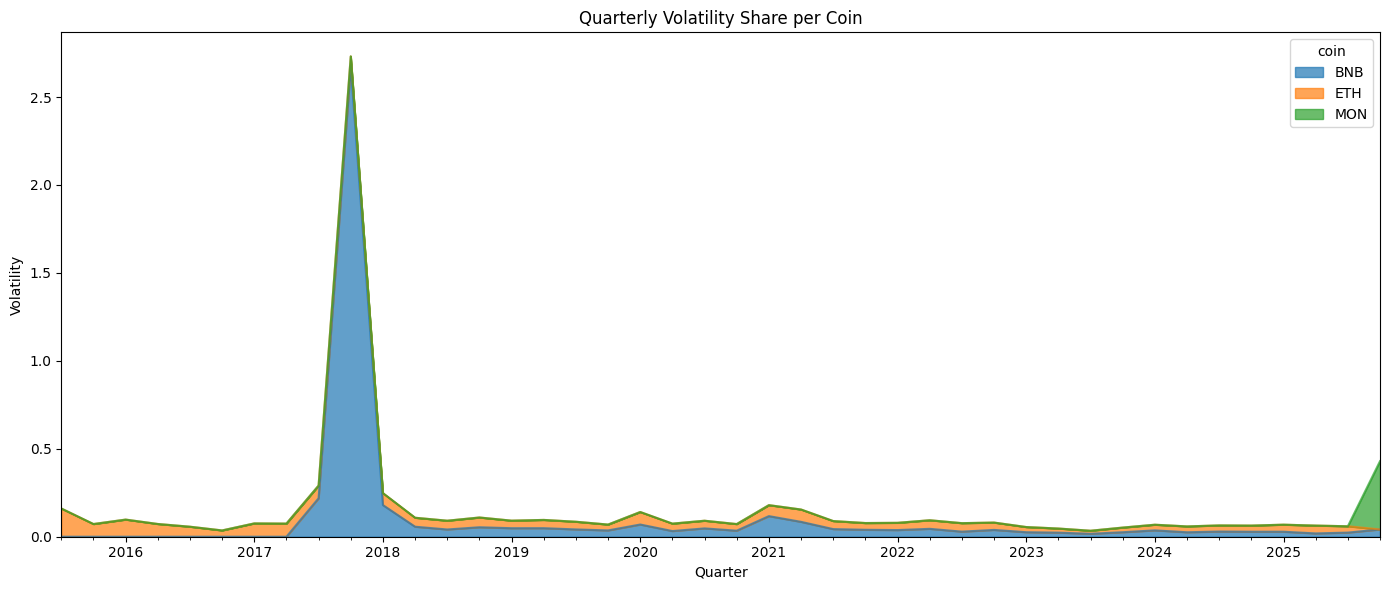


Inference:

ETH led early volatility, stabilizing post-2017 as market depth improved.

BNB showed extreme volatility in 2017 - 2018 time period, reflecting speculative adoption and liquidity shocks.

MON enters in 2025Q4 with a volatility spike despite low capitalization, indicating unreliable risk metrics and thin liquidity.


In [27]:
pivot_vol.plot.area(figsize=(14,6), alpha=0.7)
plt.title("Quarterly Volatility Share per Coin")
plt.xlabel("Quarter")
plt.ylabel("Volatility")
plt.tight_layout()
plt.show()


print("\nInference:")
print("\nETH led early volatility, stabilizing post-2017 as market depth improved.")
print("\nBNB showed extreme volatility in 2017 - 2018 time period, reflecting speculative adoption and liquidity shocks.")
print("\nMON enters in 2025Q4 with a volatility spike despite low capitalization, indicating unreliable risk metrics and thin liquidity.")

### Comparative Volatility per Coin(PLOT)
- Plotted bar chart of quarter‑over‑quarter growth volatility for each coin.

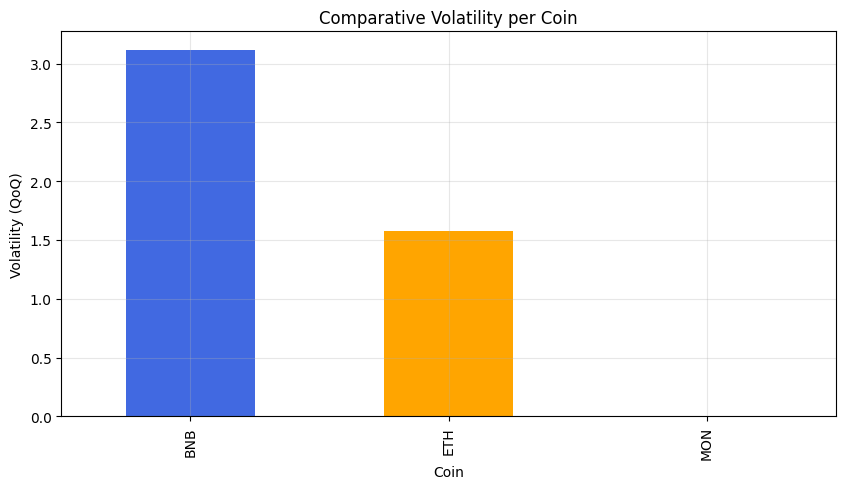


Inference:

BNB shows the highest quarter-over-quarter volatility (~3.12), indicating aggressive price swings and elevated risk exposure.

ETH exhibits moderate volatility (~1.58), reflecting more stable growth and mature market behavior.

MON has no measurable volatility due to limited data, confirming its late entry and unreliable risk metrics.


In [28]:
#plotting comparative volatility per coin

summary_df.set_index('Coin')['QoQ_Growth_Volatility'].plot(
    kind='bar',
    figsize=(10,5),
    color=['royalblue','orange','green']
)

plt.ylabel("Volatility (QoQ)")
plt.title("Comparative Volatility per Coin")
plt.grid(alpha=0.3)
plt.show()


print("\nInference:")
print("\nBNB shows the highest quarter-over-quarter volatility (~3.12), indicating aggressive price swings and elevated risk exposure.")
print("\nETH exhibits moderate volatility (~1.58), reflecting more stable growth and mature market behavior.")
print("\nMON has no measurable volatility due to limited data, confirming its late entry and unreliable risk metrics.")

### Average Return per Coin(PLOT)
- Plotted bar chart of average returns for each coin using sky-blue bars with black edges.

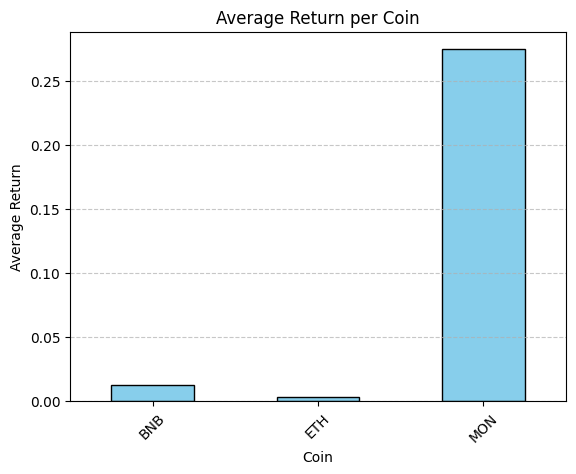

Inference:

MON shows unusually high average returns in 2025Q4, but with only one quarter of data this is a thin‑liquidity anomaly.

BNB and ETH deliver modest, stable returns consistent with mature market behavior.

High yield in MON is offset by elevated risk due to lack of historical depth.


In [29]:
# Assuming return_summary is a Series indexed by coin
return_summary.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Average Return per Coin')
plt.xlabel('Coin')
plt.ylabel('Average Return')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# MON's displaying high yield but very risky( in market high returns does not gaurentee safety )

print("Inference:")
print("\nMON shows unusually high average returns in 2025Q4, but with only one quarter of data this is a thin‑liquidity anomaly.")
print("\nBNB and ETH deliver modest, stable returns consistent with mature market behavior.")
print("\nHigh yield in MON is offset by elevated risk due to lack of historical depth.")